***What is an RNN?***

- A Recurrent Neural Network (RNN) is a type of artificial neural network designed to recognize patterns in sequential data by using loops within its architecture to retain information from previous time steps.
- It has a “memory” that stores information about what has been calculated so far, making it useful for tasks where the order of data matters — such as text, speech, and time series.

***LSTMs***

- An LSTM remembers important information for long periods and forgets irrelevant details, making it ideal for time-series forecasting, text prediction, and speech recognition.

**1. Theory: Study RNNs and LSTMs for sequence data.**

**Recurrent Neural Networks (RNNs) and LSTMs for Sequence Data**

**RNNs**

- Many real-world data types are sequential — meaning the order of elements matters.
- Examples include:
  - Words in a sentence
  - Daily stock prices
  - Sound waves in speech
  - Temperature readings over time

- Traditional neural networks (like feedforward NNs) process inputs independently, so they cannot capture relationships between elements in a sequence.
- To solve this, we use Recurrent Neural Networks (RNNs) — models designed to handle sequence data effectively.

- A Recurrent Neural Network (RNN) is a type of neural network that is specialized for processing sequential or time-dependent data.
- It introduces recurrent connections — loops in the network that allow information to persist from one time step to the next.

**Limitations of Basic RNNs**

- While RNNs are good for short sequences, they face issues with longer ones:
- Vanishing Gradient Problem: Gradients become too small during training, causing the network to “forget” early information.
- Exploding Gradient Problem: Gradients grow uncontrollably, causing unstable training.
- As a result, RNNs struggle with long-term dependencies remembering events that happened many steps earlier in the sequence.

**Application of RNNs**
- Recurrent Neural Networks (RNNs) are widely used for processing sequential data where the order of information is important.
- They are applied in speech recognition to convert spoken words into text.
- In natural language processing, RNNs are used for text generation, translation, and sentiment analysis.
- They are also useful in time series forecasting, such as predicting stock prices or weather conditions.
- Additionally, RNNs are applied in handwriting and music generation, where they learn and reproduce sequential patterns over time.


**Example: RNN for Time Series Prediction**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


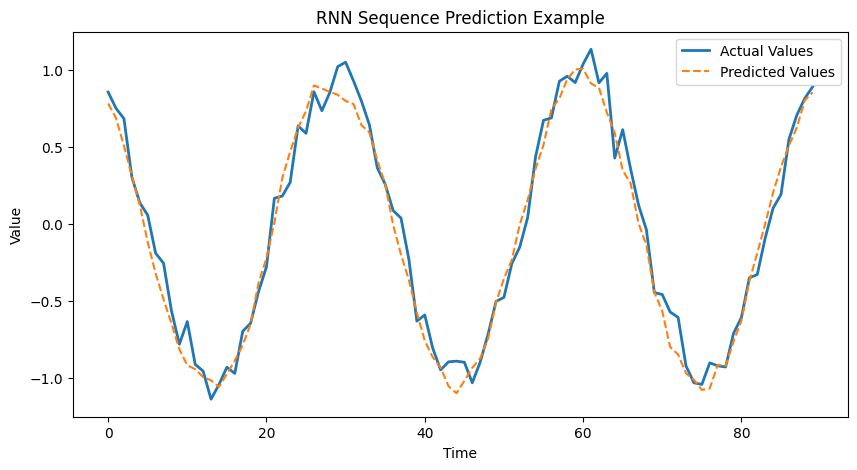

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler

# Generate synthetic sequence data (like stock prices)
np.random.seed(42)
time_steps = 100
data = np.sin(np.linspace(0, 20, time_steps)) + np.random.normal(0, 0.1, time_steps)

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Value'])

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Prepare training data (10 previous values → next value)
X, y = [], []
for i in range(10, len(scaled_data)):
    X.append(scaled_data[i-10:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Reshape for RNN input: [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build RNN model
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(X.shape[1], 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X, y, epochs=50, batch_size=8, verbose=0)

# Predict
predicted = model.predict(X)

# Inverse transform for visualization
predicted_values = scaler.inverse_transform(predicted)
actual_values = scaler.inverse_transform(y.reshape(-1, 1))

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(actual_values, label='Actual Values', linewidth=2)
plt.plot(predicted_values, label='Predicted Values', linestyle='dashed')
plt.title("RNN Sequence Prediction Example")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

**LSTMs for sequence data.**
- Long Short-Term Memory (LSTM) networks are a special type of Recurrent Neural Network (RNN) designed to learn long-term dependencies in sequence data.
- They can remember information for long periods and solve the vanishing gradient problem that standard RNNs face during training.

**How LSTMs Work**

- LSTMs use a structure called a cell state and three types of gates:

- Forget Gate – Decides what information to discard.
- Input Gate – Decides what new information to store.
- Output Gate – Decides what information to output.
- This gating mechanism helps LSTMs remember important past information while forgetting irrelevant details, making them effective for long sequences.

**Why LSTMs are Used for Sequence Data**

- They handle long-term dependencies in time-series or text data.
- Maintain context over many time steps.
- Reduce loss of information across long sequences.
- Suitable for complex sequential tasks like translation or forecasting.

**Applications of LSTMs in Sequence Data**
- LSTMs (Long Short-Term Memory networks) are used to handle sequence data where long-term context is important.
- They are widely applied in time series forecasting, such as predicting stock prices, weather, or sales trends.
- In natural language processing, LSTMs help in text generation, translation, and sentiment analysis by remembering word sequences.
- They are also used in speech recognition to convert spoken words into text by learning temporal sound patterns.
- Additionally, LSTMs are applied in anomaly detection and music generation, where understanding patterns over time is essential.

**LSTM Example: Time Series Forecasting (Stock Price Prediction)**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


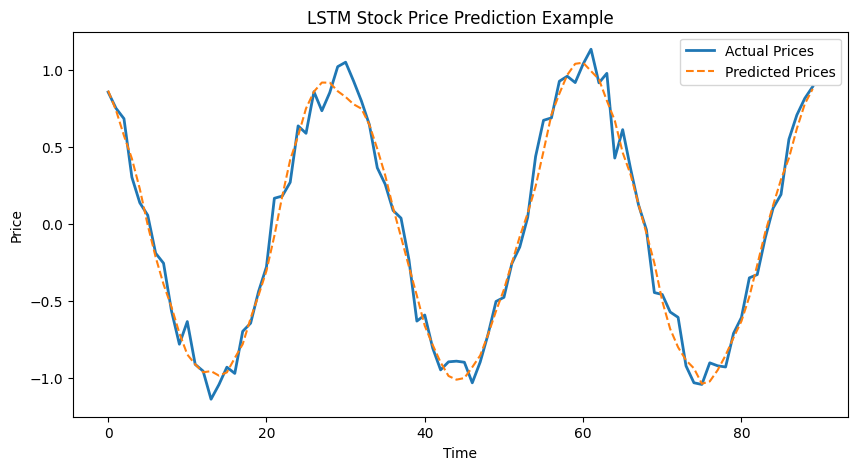

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Generate synthetic stock price data
np.random.seed(42)
time_steps = 100
data = np.sin(np.linspace(0, 20, time_steps)) + np.random.normal(0, 0.1, time_steps)

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Price'])

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Prepare training data
X, y = [], []
for i in range(10, len(scaled_data)):
    X.append(scaled_data[i-10:i, 0])  # last 10 values
    y.append(scaled_data[i, 0])       # next value
X, y = np.array(X), np.array(y)

# Reshape for LSTM input: [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(X.shape[1], 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X, y, epochs=50, batch_size=8, verbose=0)

# Predict next value
predicted = model.predict(X)

# Inverse scale for visualization
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y.reshape(-1, 1))

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(actual_prices, label='Actual Prices', linewidth=2)
plt.plot(predicted_prices, label='Predicted Prices', linestyle='dashed')
plt.title("LSTM Stock Price Prediction Example")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


**2. Hands-On: Implement an RNN or LSTM for time series forecasting or text generation.**

- Objective

  - To build and train an LSTM model that can predict future values in a time series dataset — such as stock prices or temperature trends.

- Steps Involved

  - Import Libraries
  - Prepare the Data (sequence creation)
  - Build the LSTM Model
  - Train the Model
  - Make Predictions and Visualize Results

**LSTM for Time Series Forecasting**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,009 (74.25 KB)

 Trainable params: 19,009 (74.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


125/125 - 4s - 35ms/step - loss: 0.0951 - mae: 0.1999 - val_loss: 0.0200 - val_mae: 0.1127
Epoch 2/100
125/125 - 3s - 22ms/step - loss: 0.0260 - mae: 0.1276 - val_loss: 0.0210 - val_mae: 0.1154
Epoch 3/100


125/125 - 2s - 19ms/step - loss: 0.0251 - mae: 0.1253 - val_loss: 0.0193 - val_mae: 0.1107
Epoch 4/100
125/125 - 2s - 19ms/step - loss: 0.0247 - mae: 0.1248 - val_loss: 0.0200 - val_mae: 0.1128
Epoch 5/100
125/125 - 2s - 18ms/step - loss: 0.0241 - mae: 0.1233 - val_loss: 0.0198 - val_mae: 0.1124
Epoch 6/100


125/125 - 2s - 18ms/step - loss: 0.0239 - mae: 0.1228 - val_loss: 0.0185 - val_mae: 0.1087
Epoch 7/100
125/125 - 3s - 25ms/step - loss: 0.0239 - mae: 0.1225 - val_loss: 0.0189 - val_mae: 0.1103
Epoch 8/100
125/125 - 2s - 18ms/step - loss: 0.0240 - mae: 0.1225 - val_loss: 0.0185 - val_mae: 0.1086
Epoch 9/100
125/125 - 2s - 18ms/step - loss: 0.0230 - mae: 0.1206 - val_loss: 0.0185 - val_mae: 0.1086
Epoch 10/100
125/125 - 3s - 22ms/step - loss: 0.0229 - mae: 0.1207 - val_loss: 0.0219 - val_mae: 0.1177
Epoch 11/100


125/125 - 3s - 24ms/step - loss: 0.0225 - mae: 0.1192 - val_loss: 0.0182 - val_mae: 0.1078
Epoch 12/100
125/125 - 2s - 19ms/step - loss: 0.0226 - mae: 0.1200 - val_loss: 0.0202 - val_mae: 0.1131
Epoch 13/100
125/125 - 2s - 19ms/step - loss: 0.0229 - mae: 0.1195 - val_loss: 0.0195 - val_mae: 0.1119
Epoch 14/100
125/125 - 2s - 18ms/step - loss: 0.0223 - mae: 0.1188 - val_loss: 0.0192 - val_mae: 0.1105
Epoch 15/100
125/125 - 2s - 17ms/step - loss: 0.0219 - mae: 0.1177 - val_loss: 0.0192 - val_mae: 0.1106
Epoch 16/100
125/125 - 3s - 23ms/step - loss: 0.0219 - mae: 0.1176 - val_loss: 0.0193 - val_mae: 0.1108
Epoch 17/100
125/125 - 5s - 37ms/step - loss: 0.0218 - mae: 0.1172 - val_loss: 0.0200 - val_mae: 0.1129
Epoch 18/100


125/125 - 2s - 17ms/step - loss: 0.0223 - mae: 0.1187 - val_loss: 0.0179 - val_mae: 0.1069
Epoch 19/100
125/125 - 3s - 22ms/step - loss: 0.0218 - mae: 0.1174 - val_loss: 0.0221 - val_mae: 0.1181
Epoch 20/100
125/125 - 3s - 21ms/step - loss: 0.0221 - mae: 0.1182 - val_loss: 0.0195 - val_mae: 0.1113
Epoch 21/100
125/125 - 5s - 39ms/step - loss: 0.0220 - mae: 0.1178 - val_loss: 0.0213 - val_mae: 0.1162
Epoch 22/100
125/125 - 2s - 19ms/step - loss: 0.0217 - mae: 0.1172 - val_loss: 0.0196 - val_mae: 0.1115
Epoch 23/100
125/125 - 4s - 30ms/step - loss: 0.0215 - mae: 0.1161 - val_loss: 0.0200 - val_mae: 0.1128
Epoch 24/100
125/125 - 4s - 30ms/step - loss: 0.0211 - mae: 0.1155 - val_loss: 0.0244 - val_mae: 0.1240
Epoch 25/100
125/125 - 2s - 18ms/step - loss: 0.0213 - mae: 0.1169 - val_loss: 0.0185 - val_mae: 0.1083
Epoch 26/100
125/125 - 2s - 19ms/step - loss: 0.0215 - mae: 0.1167 - val_loss: 0.0194 - val_mae: 0.1111
Epoch 27/100
125/125 - 3s - 22ms/step - loss: 0.0215 - mae: 0.1167 - val_loss

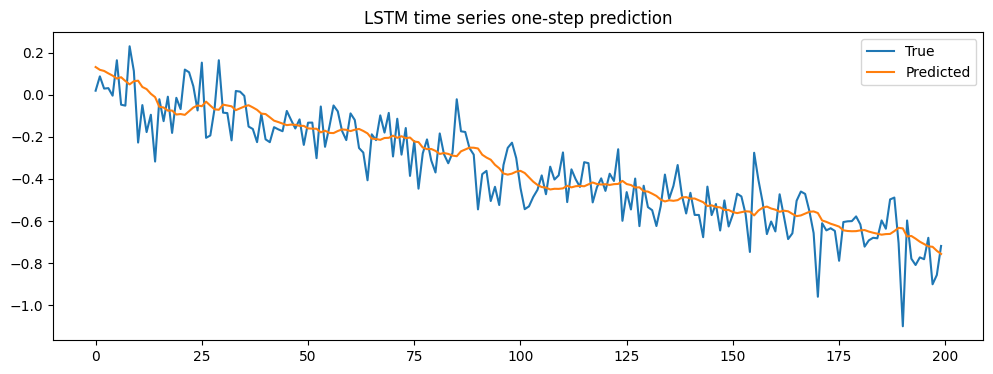

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━

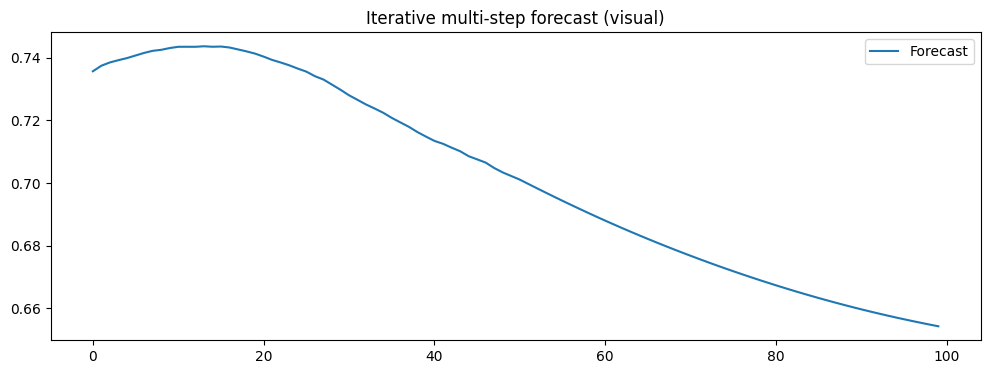

In [6]:
# Time-series forecasting with LSTM (univariate)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 1. Generate synthetic data (noisy sine wave)
np.random.seed(42)
t = np.arange(0, 1000, 0.1)
series = np.sin(0.02 * t) + 0.5 * np.sin(0.05 * t) + 0.1 * np.random.randn(len(t))
# Optional: visualize
# plt.plot(t, series); plt.title("Synthetic time series"); plt.show()

# 2. Normalize (standard scaling)
mean = series.mean()
std = series.std()
series_norm = (series - mean) / std

# 3. Create sliding windows
def create_windows(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    X = np.array(X)
    y = np.array(y)
    return X, y

WINDOW_SIZE = 50
X, y = create_windows(series_norm, WINDOW_SIZE)

# 4. Train/Test split
split = int(0.8 * len(X))
X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

# 5. Reshape to (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

# 6. Build LSTM model
model = Sequential([
    LSTM(64, input_shape=(WINDOW_SIZE, 1), return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # regression -> linear output
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# 7. Callbacks
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
mc = ModelCheckpoint('best_lstm_ts.h5', monitor='val_loss', save_best_only=True)

# 8. Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=64,
    callbacks=[es, mc],
    verbose=2
)

# 9. Evaluate and predict
val_loss, val_mae = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation loss (MSE): {val_loss:.5f}, MAE: {val_mae:.5f}")

# Predict one-step for last part and de-normalize
preds_norm = model.predict(X_val)
preds = preds_norm.flatten() * std + mean
y_true = y_val * std + mean

# 10. Plot predictions vs ground truth (first 200 points)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(y_true[:200], label='True')
plt.plot(preds[:200], label='Predicted')
plt.legend(); plt.title('LSTM time series one-step prediction'); plt.show()

# 11. Multi-step forecast example (iterative forecasting)
def forecast_iterative(model, seed_sequence, n_steps):
    seq = seed_sequence.copy().tolist()
    preds = []
    for _ in range(n_steps):
        x = np.array(seq[-WINDOW_SIZE:]).reshape((1, WINDOW_SIZE, 1))
        p = model.predict(x)[0,0]
        seq.append(p)
        preds.append(p)
    return np.array(preds)

# pick last seen window in normalized scale
seed = series_norm[-WINDOW_SIZE:]
multi_step_pred_norm = forecast_iterative(model, seed, n_steps=100)
multi_step_pred = multi_step_pred_norm * std + mean

# plot multi-step forecast
plt.figure(figsize=(12,4))
actual_future = series[-WINDOW_SIZE: -WINDOW_SIZE + 100]  # not exactly aligned but for visualization
plt.plot(range(len(multi_step_pred)), multi_step_pred, label='Forecast')
plt.title("Iterative multi-step forecast (visual)")
plt.legend(); plt.show()


- Window size: tune (shorter windows capture short patterns; longer windows capture long-term dependencies).

- For real-world data, use walk-forward validation, not single split.

- Consider scaling per-window or using RobustScaler if outliers exist.

- If forecasting multiple steps simultaneously, use return_sequences=True + TimeDistributed or sequence-to-sequence architecture, or make the model output multiple steps (Dense with n_steps_out).

- If series have seasonality/trend, consider adding time features (hour/day/lag features) or differencing.

**3. Client Project: Use RNN or LSTM to predict time series data (e.g., stock prices).**

***Client Project: Stock Price Prediction using LSTM***

**Objective**

- Predict future stock prices using an LSTM (Long Short-Term Memory) network — a special type of Recurrent Neural Network that captures temporal dependencies in sequential data.

**Step 1: Import Required Libraries**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

**Step 2: Load and Inspect the Data**

In [10]:
# Load dataset
df = pd.read_csv("NFLX.csv")

# Display first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

         Date        Open        High         Low       Close   Adj Close  \
0  2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1  2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2  2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3  2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4  2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900  
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


**Step 3: Prepare the Data**

- We’ll use the ‘Close’ price for prediction.

In [13]:
data = df.filter(['Close'])
dataset = data.values

training_data_len = int(np.ceil(len(dataset) * 0.8))
training_data_len

808

In [14]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

**Step 4: Create Training Dataset**

- Use 60 previous days to predict the next day.

In [15]:
train_data = scaled_data[0:int(training_data_len), :]
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

**Step 5: Build the LSTM Model**

In [16]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Step 6: Train the Model**

In [17]:
model.fit(X_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0593
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0044
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0022
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0021
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0020
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0023
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0019
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0018
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0017
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0019
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0018
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0017
Epoch 13/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0019
Epoch 14/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0015
Epoch 15/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0016
Epoc

**Step 7: Test Dataset Preparation**

In [21]:
test_data = scaled_data[training_data_len - 60:, :]
X_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

**Step 8: Make Predictions and Inverse Transform**

In [23]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


**Step 9: Visualize the Results**

/tmp/ipython-input-2882384227.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


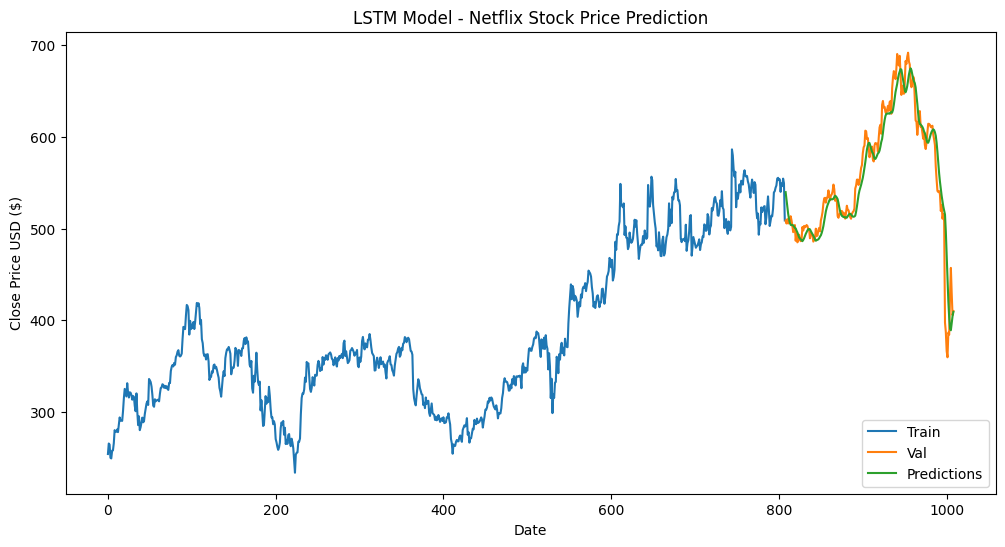

In [24]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(12,6))
plt.title('LSTM Model - Netflix Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

**Step 10: Evaluate the Model**

In [25]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(valid['Close'], valid['Predictions']))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 22.560222081939944
